In [1]:
import numpy as np
from control import matlab
from matplotlib import pyplot as plt
from scipy import arange 

In [2]:
#システムパラメータを与える
A = np.array([[0.0, 1.0], [-2.0,-3.0]]) #行列A
b = np.array([[0.0], [1.0]]) #ベクトルb
c = np.array([[1.0, 0.0],[0.0,1.0]]) #x_{1}とx_{2}をプロットするためにcを単位行列にする
d = np.array([[0.0],[0.0]]) #cに合わせてdは零ベクトルとする

#システム行列Aの固有値を求める
(eig, eig_vec) = np.linalg.eig(A)
print("pole = ",eig)

pole =  [-1. -2.]


In [3]:
#配置する閉ループ極を与える
poles1 = [-2.0, -3.0] #-2, -3の場合
poles2 = [-1.0 + 3j, -1.0 - 3j] #-1.0 + 3j, -1.0 - 3jの場合

#アッカーマンの方法によりフィードバックゲインを求める
f1 = matlab.place(A, b, poles1) #-2, -3の場合のフィードバックゲインf1
f2 = matlab.place(A, b, poles2) #-1+j3, -1-j3の場合のフィードバックゲインf2
print("feedback gain =", f1) #フィードバックゲインの表示
print("feedback gain =", f2) #フィードバックゲインの表示

feedback gain = [[ 4.  2.]]
feedback gain = [[ 8. -1.]]


In [4]:
#閉ループ極の表示
(eig_closed1, eig_vec_closed1) = np.linalg.eig(A - b*f1) #f1の場合の閉ループ極
(eig_closed2, eig_vec_closed2) = np.linalg.eig(A - b*f2) # f2の場合の閉ループ極
print('closed roop pole =',eig_closed1) #閉ループ極の表示
print('closed roop pole =',eig_closed2) #閉ループ極の表示

closed roop pole = [-2. -3.]
closed roop pole = [-1.+3.j -1.-3.j]


In [5]:
#閉ループシステムの状態空間表現を求める
sysC1 = matlab.ss(A - b*f1, b, c, d) #f1の場合の閉ループシステム
sysC2 = matlab.ss(A - b*f2, b, c, d) #f2の場合の閉ループシステム

In [6]:
#時間変数の定義
t = arange(0, 10, 0.01) #0から10まで0.01刻み

#システムの初期値を与える
x0 = np.array([[1.0],[1.0]]) #x(0) = [1;1]'

#初期値応答の計算
y1, t = matlab.initial(sysC1, t, x0) #f1の場合の初期値応答を求める
y2, t = matlab.initial(sysC2, t, x0) #f1の場合の初期値応答を求める

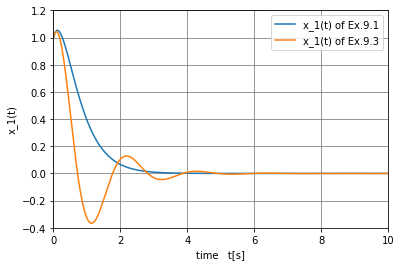

In [11]:
# 図9.3(a)の描画
plt.plot(t, y1[:,0], label = "x_1(t) of Ex.9.1")#ex9_1のx_{1}を抽出してplotする
plt.plot(t, y2[:,0], label = "x_1(t) of Ex.9.3")#ex9_3のx_{1}を抽出してplotする
plt.xlim([0,10]) #横軸（時間軸）の範囲の指定
plt.ylim([-0.4, 1.2]) #縦軸の範囲の設定
plt.grid(color='gray') #罫線を表示
plt.xlabel("time   t[s]") #横軸のラベル表示
plt.ylabel("x_1(t)") #縦軸のラベル表示
plt.legend() #凡例の表示
plt.show() #グラフの表示

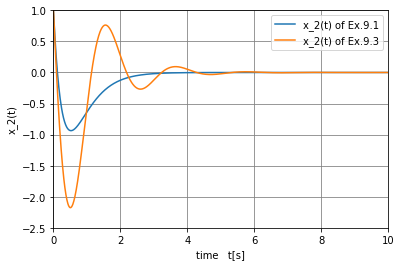

In [12]:
# 図9.3(b)の描画
plt.plot(t, y1[:,1], label = "x_2(t) of Ex.9.1")#ex9_1のx_{2}を抽出してplotする
plt.plot(t, y2[:,1], label = "x_2(t) of Ex.9.3")#ex9_3のx_{2}を抽出してplotする
plt.xlim([0,10]) #横軸（時間軸）の範囲の指定
plt.ylim([-2.5, 1.0]) #縦軸の範囲の設定
plt.grid(color='gray') #罫線を表示
plt.xlabel("time   t[s]") #横軸のラベル表示
plt.ylabel("x_2(t)") #縦軸のラベル表示
plt.legend() #凡例の表示
plt.show()